# **Ejercicio Práctico: Proyección del Recaudo**

**Objetivo:** El objetivo de este ejercicio es proyectar el recaudo basado en datos históricos.

**Indicaciones:** Inicia realizando un análisis descriptivo y exploratorio de la variable recaudo. Normaliza los datos de entrenamiento y de prueba, dejando el recaudo en su escala original. Ajusta al menos dos algoritmos predictivos de Machine Learning al conjunto de datos de entrenamiento (datos_train) y predice con el conjunto de datos de prueba (datos_test). Elige el mejor modelo ajustado utilizando el RMSE. Calcula la asertividad de los modelos. (Puedes hacerlo en R o en Python).

\\

$$Asertividad=\frac{ \sum_{k=1}^{3}(Observados_k) }{\sum_{k=1}^{3}(Predichos_k)}$$

\\


Descripción de las variables del conjunto de datos, **datos_train:** en este conjunto de datos vas a encontrar un conjunto de 11 variables (columnas); la variable de respuesta: Recaudo y otras 10 variables de entrada, explicativas o regresoras. A continuación, su descripción:

+ **Recaudo:** Dinero que la empresa ha recolectado.
+ **Semana:** Número de la semana en la que se ha recolectado o se recolectará la venta realizada.
+ **Venta:** Total de ventas realizadas por los grupos que facturan en esa semana.
+ **Cons:** Proporción de clientes que harán pedidos consecutivos.
+ **Grupos:** Número de grupos de clientes de diferentes zonas del país que facturan en una semana.
+ **Festivos:** Número de días festivos en la semana.
+ **Ing:** Número de ingresos realizados o planificados.
+ **Egr:** Número de egresos realizados o planificados.
+ **Ped:** Número de pedidos realizados o planificados.
+ **NS:** Nivel de servicio de la operación.
+ **OP:** Promedio de órdenes de los grupos que facturan en una semana.

# **Cargar bases de datos**

In [31]:
# Modulos utilizados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


In [32]:
bd_train = pd.read_csv('datos_train.csv', sep=';')
bd_test = pd.read_csv('datos_test.csv', sep=';')

In [33]:
bd_train.head()
bd_test.head()

,Recaudo,Semana,Venta,Cons,Grupos,Festivo,Ing,Egr,Ped,NS,OP
0,7176699,20,8131821,"0,7455",6,2,2619,3640,22764,"0,9627",265
1,8746592,21,8469008,"0,7601",6,1,2387,3229,24006,"0,9119",323
2,8467936,22,10113460,"0,8006",8,1,3816,5334,32746,"0,9297",314


# **Análisis descriptivo y exploratorio de la variable recaudo**

In [34]:
bd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Recaudo  3 non-null      int64 
 1   Semana   3 non-null      int64 
 2   Venta    3 non-null      int64 
 3   Cons     3 non-null      object
 4   Grupos   3 non-null      int64 
 5   Festivo  3 non-null      int64 
 6   Ing      3 non-null      int64 
 7   Egr      3 non-null      int64 
 8   Ped      3 non-null      int64 
 9   NS       3 non-null      object
 10  OP       3 non-null      int64 
dtypes: int64(9), object(2)
memory usage: 396.0+ bytes


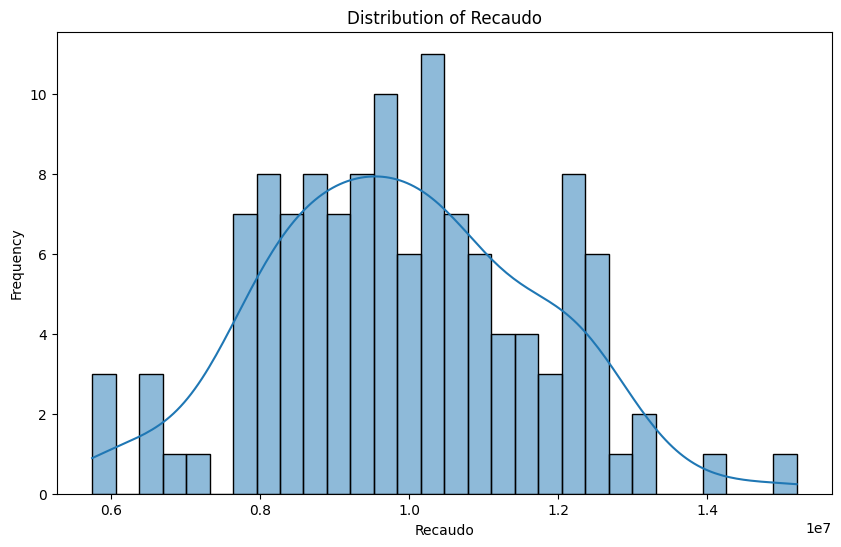

count    1.230000e+02
mean     9.875488e+06
std      1.793220e+06
min      5.745256e+06
25%      8.643220e+06
50%      9.790339e+06
75%      1.097842e+07
max      1.520148e+07
Name: Recaudo, dtype: float64

In [35]:
bd_train['Recaudo'] = pd.to_numeric(bd_train['Recaudo'], errors='coerce')
# Descriptive statistics
recaudo_desc = bd_train['Recaudo'].describe()
plt.figure(figsize=(10, 6))
sns.histplot(bd_train['Recaudo'], bins=30, kde=True)
plt.title('Distribution of Recaudo')
plt.xlabel('Recaudo')
plt.ylabel('Frequency')
plt.show()

recaudo_desc

Recaudo sugiere datos normales con peso cola derecha (ligero)

# **Normaliza los datos de entrenamiento y de prueba**

In [36]:
features_to_normalize = ['Semana', 'Venta', 'Cons', 'Grupos', 'Festivo', 'Ing', 'Egr', 'Ped', 'NS', 'OP']


In [37]:
bd_train.Cons.head()

0    0,5582
1    0,5765
2    0,7158
3    0,5991
4    0,8001
Name: Cons, dtype: object

In [38]:
# limpieza
columns_to_clean = ['Cons', 'NS', 'OP']


for column in columns_to_clean:
    bd_train[column] = bd_train[column].astype(str).str.replace(',', '.').astype(float)
    bd_test[column] = bd_test[column].astype(str).str.replace(',', '.').astype(float)

for column in columns_to_clean:
    bd_train[column] = bd_train[column].astype(str).str.replace(',', '.').astype(float)
    bd_test[column] = bd_test[column].astype(str).str.replace(',', '.').astype(float)






In [39]:
features_to_normalize = ['Semana', 'Venta', 'Cons', 'Grupos', 'Festivo', 'Ing', 'Egr', 'Ped', 'NS', 'OP']
scaler = StandardScaler()

#esaclar
scaler.fit(bd_train[features_to_normalize])

# Transform the training and test data
train_data_normalized = bd_train.copy()
test_data_normalized = bd_test.copy()

In [40]:
train_data_normalized.head(), test_data_normalized.head()

(    Recaudo  Semana     Venta    Cons  Grupos  Festivo   Ing    Egr    Ped  \
 0  11281867       1  10202335  0.5582       6        2   773   6444  21136   
 1   8771003       2  10348824  0.5765       8        2  1453  11660  31072   
 2  10975992       3  12343136  0.7158      10        1  2618  11376  36276   
 3   9333463       4   9060492  0.5991      10        1  2574   8388  33235   
 4  10200774       5   9664874  0.8001       8        1  4617   6155  34696   
 
        NS     OP  
 0  0.7520  192.0  
 1  0.7197  181.0  
 2  0.9598  294.0  
 3  0.7299  233.0  
 4  0.9502  293.0  ,
    Recaudo  Semana     Venta    Cons  Grupos  Festivo   Ing   Egr    Ped  \
 0  7176699      20   8131821  0.7455       6        2  2619  3640  22764   
 1  8746592      21   8469008  0.7601       6        1  2387  3229  24006   
 2  8467936      22  10113460  0.8006       8        1  3816  5334  32746   
 
        NS     OP  
 0  0.9627  265.0  
 1  0.9119  323.0  
 2  0.9297  314.0  )

# **Entrenamiento de algoritmos predictivos de Machine Learning**

Ajusta al menos dos algoritmos predictivos de Machine Learning al conjunto de datos de entrenamiento (datos_train)

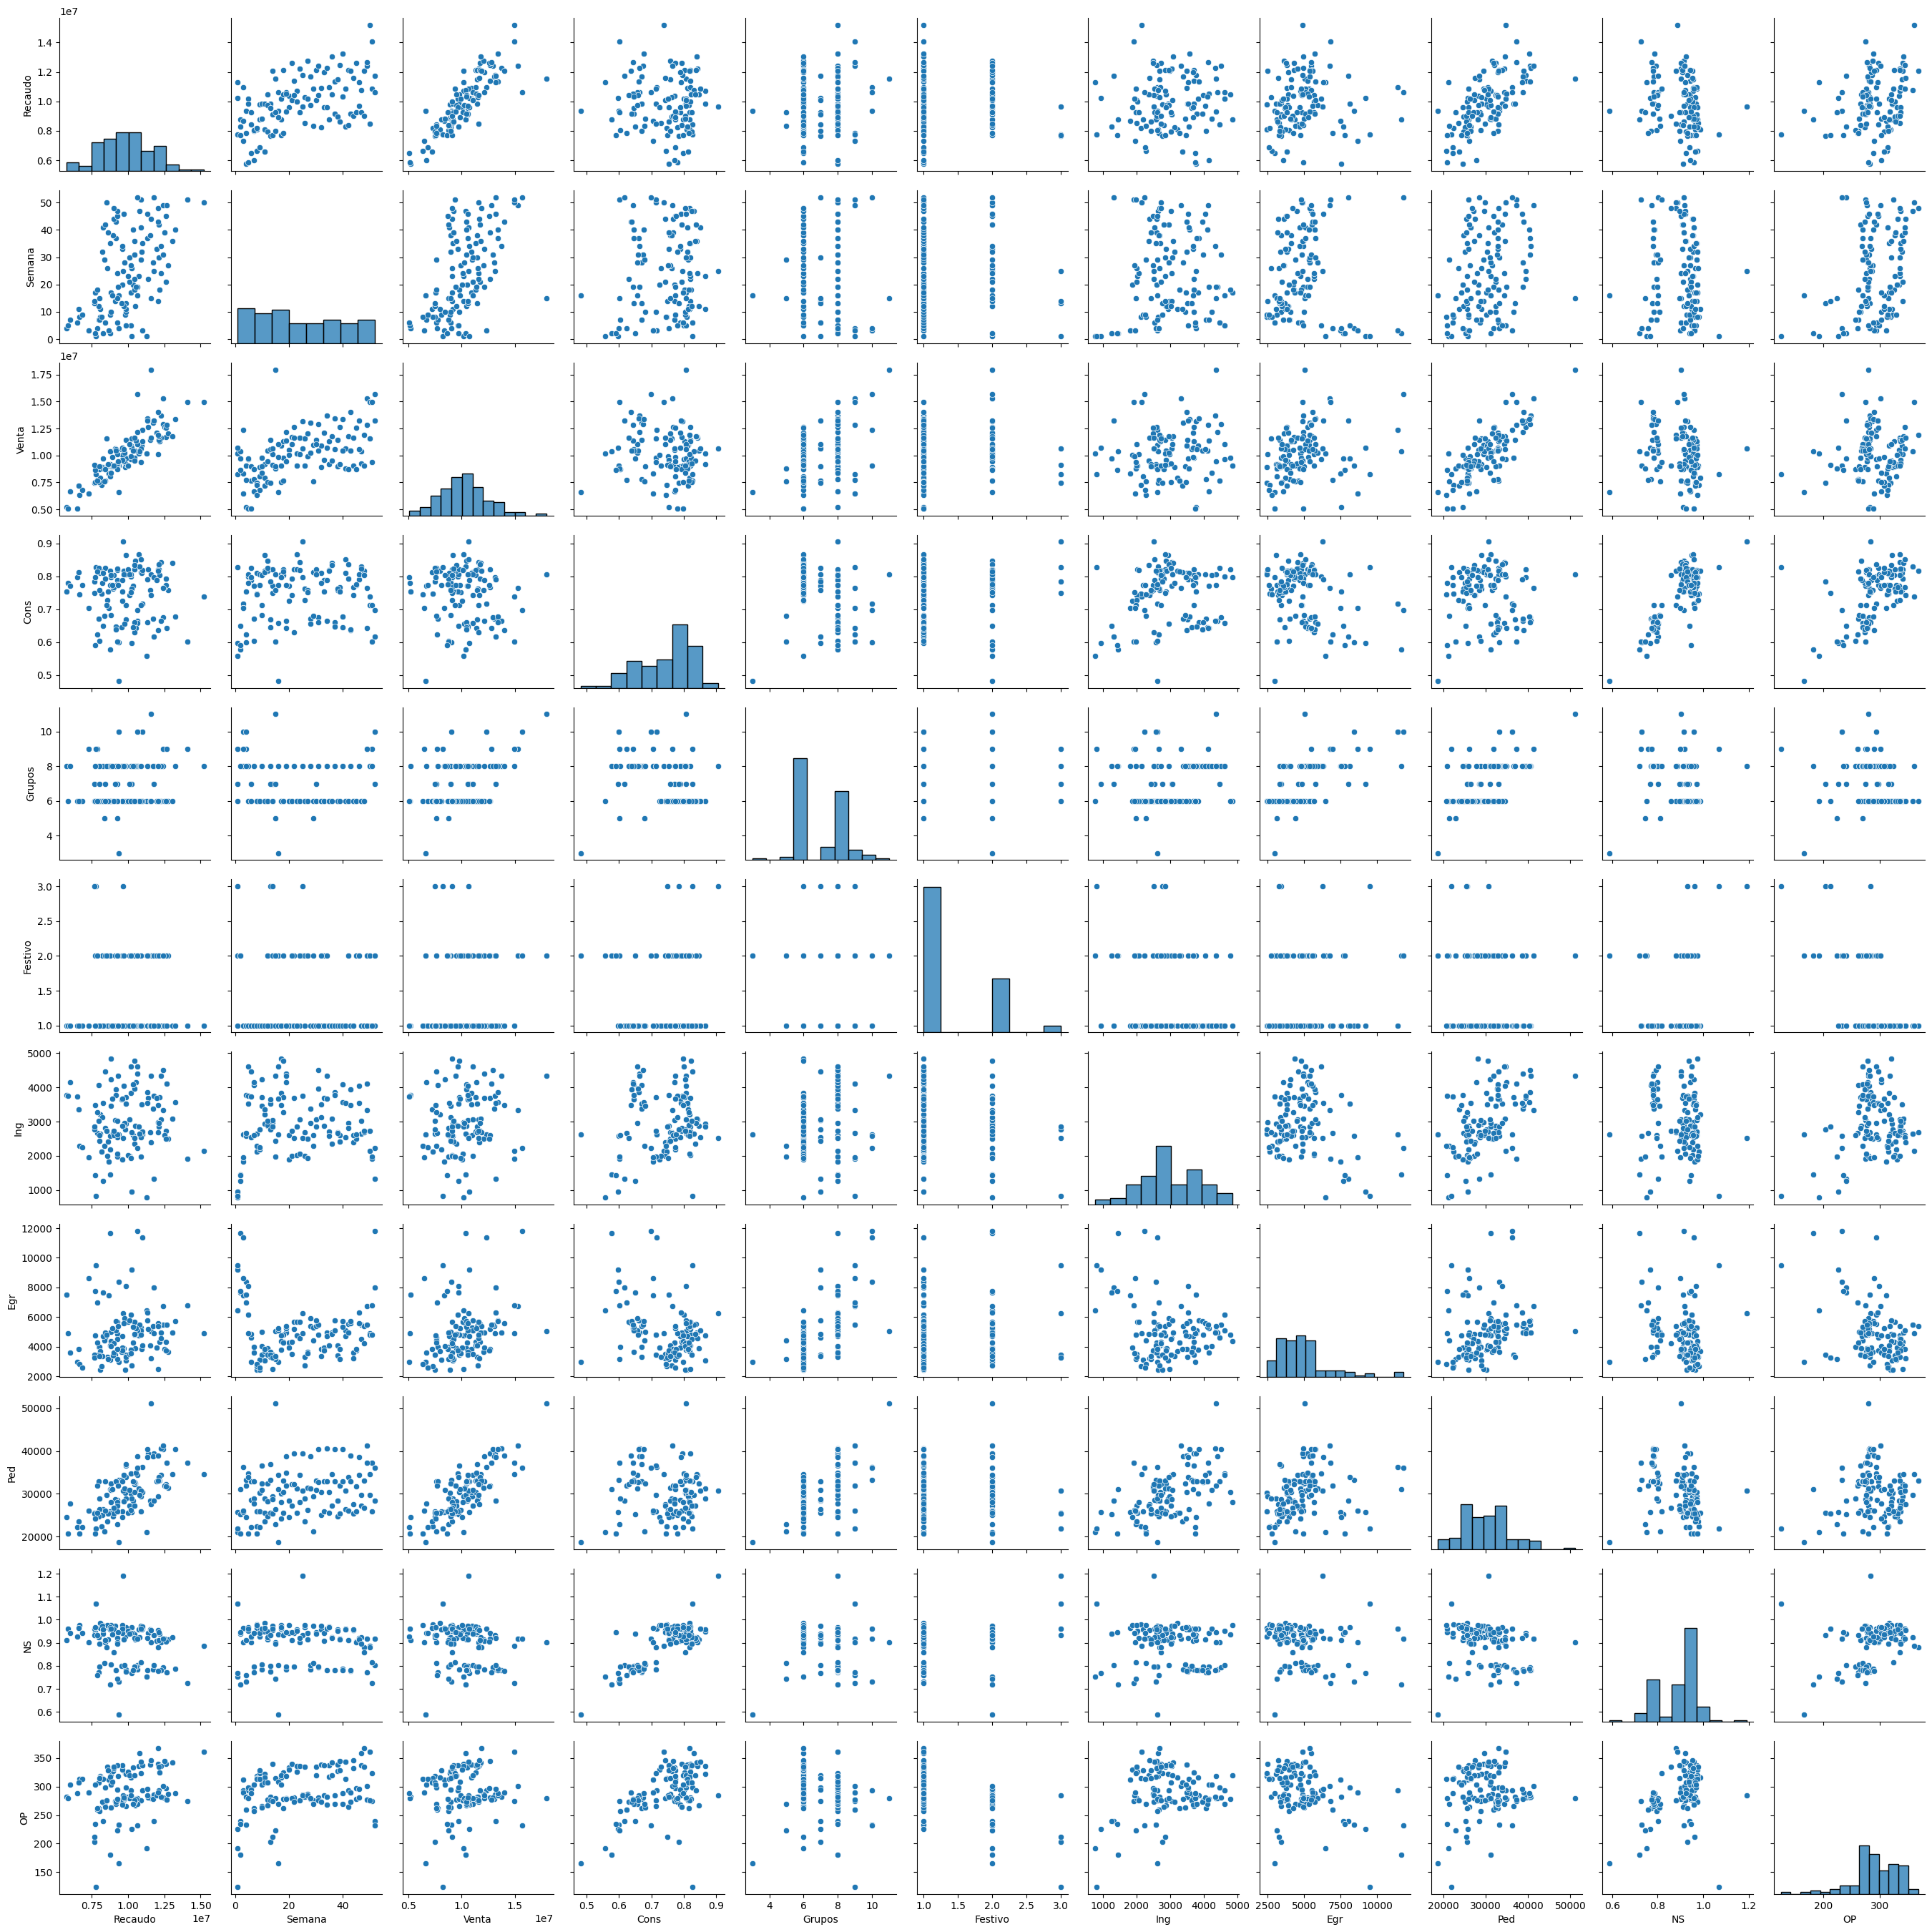

In [41]:
sns.pairplot(bd_train)
plt.show()

 * Recuado directamente relacionado con la venta. Intuicion logica.
 * Venta presenta comportamiento normale (parece), al igual que red  le ingreso.
 * Para predecir recaudo se espera que venta, semana y red sean variables significativas para el modelo 

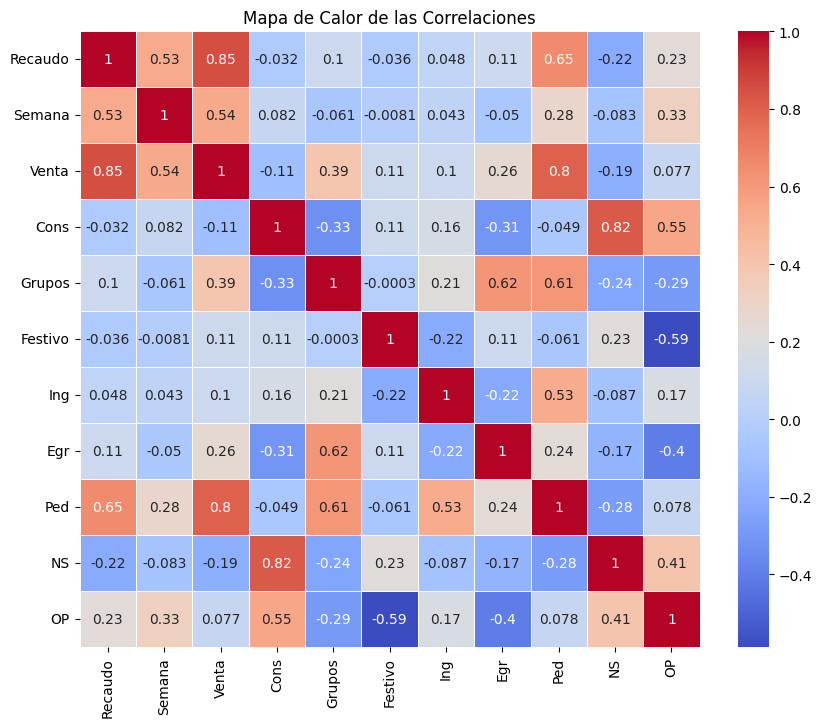

In [42]:
correlation_matrix = bd_train.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de las Correlaciones')
plt.show()


* Las variables qu epresentan una correlacion fuerte respecto al recaudo son Venta y Ped. Esto implica que estas dos variables *podrian* tener un papel preponderante a la hora de realizar la prediccion. Dicho de otra maner,a se espera que sean variables estadisticamente significativas.

 * Semana, OP, NS, Egr, Grupos; son variables que presentan una correlacion debil. Podrian ayudar para con la prediccion pero no se asegura que sean estadisticamente significativas en terminos de la regresion

In [43]:

X_train = bd_train.drop(columns=['Recaudo'])
y_train = bd_train['Recaudo']

# Asegurarse de que X_test tenga las mismas columnas que X_train
X_test = bd_test[X_train.columns]


In [44]:
# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento de modelos
# Modelo 1: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Modelo 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [45]:
# Predicciones
lr_predictions = lr_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)

In [46]:
X_test_actualizados = bd_test[X_train.columns]
# Normalización de los datos
X_test_scaled_actualizados = scaler.transform(X_test_actualizados)

In [47]:
lr_predictions_actualizados = lr_model.predict(X_test_scaled_actualizados)
rf_predictions_actualizados = rf_model.predict(X_test_scaled_actualizados)

In [48]:
predicciones_actualizadas = pd.DataFrame({
    'Predicciones Regresión Lineal': lr_predictions_actualizados,
    'Predicciones Random Forest': rf_predictions_actualizados
})
predicciones_actualizadas

,Predicciones Regresión Lineal,Predicciones Random Forest
0,8.015563e+06,8274015.24
1,9.022304e+06,8646263.48
2,9.476896e+06,9562318.77


# **Prueba de algoritmos predictivos de Machine Learning**

Usa los algoritmos entrenados para predecir el recaudo, usa el conjunto de datos de prueba (datos_test).

In [49]:
datos_train_actualizados = pd.read_csv('datos_train.csv', delimiter=';')
datos_test_actualizados = pd.read_csv('datos_test.csv', delimiter=';')

# Revisar los nombres de las columnas
datos_train_actualizados.columns, datos_test_actualizados.columns

(Index(['Recaudo', 'Semana', 'Venta', 'Cons', 'Grupos', 'Festivo', 'Ing', 'Egr',
        'Ped', 'NS', 'OP'],
       dtype='object'),
 Index(['Recaudo', 'Semana', 'Venta', 'Cons', 'Grupos', 'Festivo', 'Ing', 'Egr',
        'Ped', 'NS', 'OP'],
       dtype='object'))

In [50]:
# Renombrar la columna 'Festivo' a 'Festivos' en ambos conjuntos de datos
datos_train_actualizados.rename(columns={'Festivo': 'Festivos'}, inplace=True)
datos_test_actualizados.rename(columns={'Festivo': 'Festivos'}, inplace=True)

# Reemplazar comas por puntos en ambos conjuntos de datos
datos_train_actualizados = datos_train_actualizados.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
datos_test_actualizados = datos_test_actualizados.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Convertir las columnas a tipo float
for col in datos_train_actualizados.columns:
    datos_train_actualizados[col] = pd.to_numeric(datos_train_actualizados[col], errors='coerce')

for col in datos_test_actualizados.columns:
    datos_test_actualizados[col] = pd.to_numeric(datos_test_actualizados[col], errors='coerce')

# Separar características y variable objetivo en el conjunto de entrenamiento
X_train_actualizados = datos_train_actualizados.drop(columns=['Recaudo'])
y_train_actualizados = datos_train_actualizados['Recaudo']

# Asegurarse de que X_test tenga las mismas columnas que X_train
X_test_actualizados = datos_test_actualizados[X_train_actualizados.columns]

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled_actualizados = scaler.fit_transform(X_train_actualizados)
X_test_scaled_actualizados = scaler.transform(X_test_actualizados)

# Entrenamiento de modelos
# Modelo 1: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled_actualizados, y_train_actualizados)

# Modelo 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled_actualizados, y_train_actualizados)

# Predicciones con los modelos entrenados
lr_predictions_actualizados = lr_model.predict(X_test_scaled_actualizados)
rf_predictions_actualizados = rf_model.predict(X_test_scaled_actualizados)

# Mostrar las predicciones actualizadas
predicciones_actualizadas = pd.DataFrame({
    'Predicciones Regresión Lineal': lr_predictions_actualizados,
    'Predicciones Random Forest': rf_predictions_actualizados
})


predicciones_actualizadas


C:\Users\jhonatan.garcia\AppData\Local\Temp\ipykernel_6532\79347302.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos_train_actualizados = datos_train_actualizados.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
C:\Users\jhonatan.garcia\AppData\Local\Temp\ipykernel_6532\79347302.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos_test_actualizados = datos_test_actualizados.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)


,Predicciones Regresión Lineal,Predicciones Random Forest
0,8.015563e+06,8274015.24
1,9.022304e+06,8646263.48
2,9.476896e+06,9562318.77


In [51]:
# Los valores reales de recaudo son los datos en la columna 'Recaudo' del archivo de prueba
y_test_real_actualizados = datos_test_actualizados['Recaudo'].values

# Cálculo del RMSE con los datos de prueba actualizados
lr_rmse_actualizados = np.sqrt(mean_squared_error(y_test_real_actualizados, lr_predictions_actualizados))
rf_rmse_actualizados = np.sqrt(mean_squared_error(y_test_real_actualizados, rf_predictions_actualizados))

# Selección del mejor modelo basado en RMSE
best_model_actualizados = 'Regresión Lineal' if lr_rmse_actualizados < rf_rmse_actualizados else 'Random Forest'

# Cálculo de la asertividad
asertividad_lr_actualizados = np.sum(y_test_real_actualizados[:3]) / np.sum(lr_predictions_actualizados[:3])
asertividad_rf_actualizados = np.sum(y_test_real_actualizados[:3]) / np.sum(rf_predictions_actualizados[:3])

result_actualizados = {
    "RMSE Regresión Lineal": lr_rmse_actualizados,
    "RMSE Random Forest": rf_rmse_actualizados,
    "Mejor Modelo": best_model_actualizados,
    "Asertividad Regresión Lineal": asertividad_lr_actualizados,
    "Asertividad Random Forest": asertividad_rf_actualizados
}

result_actualizados


{'RMSE Regresión Lineal': 774103.6155345559,
 'RMSE Random Forest': 896631.1745948461,
 'Mejor Modelo': 'Regresión Lineal',
 'Asertividad Regresión Lineal': 0.9199111893873864,
 'Asertividad Random Forest': 0.9210284984020275}

RMSE mas bajo, Regresion Lineal. Segun esto, regresion lineal. 

In [52]:
from xgboost import XGBRegressor

# Entrenamiento del modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled_actualizados, y_train_actualizados)

# Predicciones con el modelo XGBoost
xgb_predictions_actualizados = xgb_model.predict(X_test_scaled_actualizados)

# Cálculo del RMSE con el modelo XGBoost
xgb_rmse_actualizados = np.sqrt(mean_squared_error(y_test_real_actualizados, xgb_predictions_actualizados))

# Cálculo de la asertividad para el modelo XGBoost
asertividad_xgb_actualizados = np.sum(y_test_real_actualizados[:3]) / np.sum(xgb_predictions_actualizados[:3])

# Actualización de los resultados con el modelo XGBoost
result_actualizados.update({
    "RMSE XGBoost": xgb_rmse_actualizados,
    "Asertividad XGBoost": asertividad_xgb_actualizados
})

# Selección del mejor modelo incluyendo XGBoost
if xgb_rmse_actualizados < lr_rmse_actualizados and xgb_rmse_actualizados < rf_rmse_actualizados:
    best_model_actualizados = 'XGBoost'
elif lr_rmse_actualizados < rf_rmse_actualizados:
    best_model_actualizados = 'Regresión Lineal'
else:
    best_model_actualizados = 'Random Forest'

result_actualizados["Mejor Modelo"] = best_model_actualizados

result_actualizados


{'RMSE Regresión Lineal': 774103.6155345559,
 'RMSE Random Forest': 896631.1745948461,
 'Mejor Modelo': 'XGBoost',
 'Asertividad Regresión Lineal': 0.9199111893873864,
 'Asertividad Random Forest': 0.9210284984020275,
 'RMSE XGBoost': 743338.299935108,
 'Asertividad XGBoost': 0.9204918809831792}

# **Elige el mejor modelo ajustado utilizando el RMSE.**

Basado en la métrica anterior, el mejor modelo es el XGBoost, ya que presenta un menor RMSE y una mejor predicción. Sin embargo, recuerde que el coste computacional de XGBoost es elevado. La regresión lineal también hace un buen trabajo.

NOTA: Debido a temas laborales, tuve que realizar la prueba en aproximadamente 20 minutos. Algunas de las consideraciones pertinentes son que algunos modelos son paramétricos, lo que implica que se deben realizar las respectivas pruebas para verificar los supuestos del modelo (regresión lineal múltiple). Dicho esto, dado que no se tuvo tiempo para realizar dichas pruebas, se propone utilizar XGBoost, ya que no requiere pruebas de supuestos al ser un modelo no paramétrico. Además, dado que el conjunto de datos es pequeño, el costo computacional es relativamente bajo en relación con el beneficio obtenido.